# Module 2 Assessment — Python for Data Work

## Assessment Instructions

This notebook is submitted for automated assessment.

**Context:** You will acquire, load, and analyse **real financial data** from authoritative sources:
- Dow Jones Industrial Average (DJIA) from Wall Street Journal
- USD/GBP Exchange Rate from the Federal Reserve (FRED)
- Federal Funds Rate from the Federal Reserve (FRED)

**Learning Objectives:**
- Download real financial data from professional sources
- Load CSV data into pandas DataFrames
- Clean and transform real-world data
- Perform analysis on actual market data

**Rules:**
- Do not rename required variables (e.g., `djia_df`, `fx_df`, `rates_df`)
- Ensure the notebook runs top-to-bottom without errors
- Include visualisations where requested
- Write clear analysis in Task 5

**Total Points:** 100

Assessment is performed **after submission** using automated tests on the server.

---

## Part 0: Data Acquisition (Complete Before Starting)

Before you begin the assessment tasks, you must download three datasets from authoritative financial sources. This is a critical skill for any data professional working with financial data.

> **Note:** When clicking links below, you may see a "Redirect Notice" page - this is normal, just click to continue.

---

### Dataset 1: Dow Jones Industrial Average (DJIA)

**Source:** Wall Street Journal Markets

**Link:** [https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices](https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices)

**Steps:**
1. Click the link above
2. You may need to create a free WSJ account or sign in
3. Set the date range:
   - **Start Date:** 01/01/2023
   - **End Date:** 31/12/2024 (or most recent available)
4. Click **Download a Spreadsheet**
5. Save the file as **`djia_data.csv`**
6. Open the CSV to verify it contains columns for: Date, Open, High, Low, Close

---

### Dataset 2: USD/GBP Exchange Rate

**Source:** Federal Reserve Economic Data (FRED) - St. Louis Fed

**Link:** [https://fred.stlouisfed.org/series/DEXUSUK](https://fred.stlouisfed.org/series/DEXUSUK)

**Steps:**
1. Click the link above
2. You'll see a chart of the "U.S. / U.K. Foreign Exchange Rate"
3. Above the chart, click **Edit Graph** (pencil icon)
4. In the panel that opens, find **Customize data range**:
   - **Start:** 2023-01-01
   - **End:** 2024-12-31
5. Click **Apply** to update the chart
6. Click the **Download** button (top right, looks like a download arrow)
7. Select **CSV (data)**
8. Save the file as **`fx_usd_gbp.csv`**

**What this data shows:** How many US dollars ($) you need to buy 1 British Pound (£)

---

### Dataset 3: Federal Funds Effective Rate

**Source:** Federal Reserve Economic Data (FRED) - St. Louis Fed

**Link:** [https://fred.stlouisfed.org/series/FEDFUNDS](https://fred.stlouisfed.org/series/FEDFUNDS)

**Steps:**
1. Click the link above
2. You'll see a chart of the "Federal Funds Effective Rate"
3. Above the chart, click **Edit Graph** (pencil icon)
4. In the panel that opens, find **Customize data range**:
   - **Start:** 2020-01-01 (to see the full rate cycle)
   - **End:** 2024-12-31
5. Click **Apply** to update the chart
6. Click the **Download** button (top right)
7. Select **CSV (data)**
8. Save the file as **`fed_funds_rate.csv`**

**What this data shows:** The interest rate at which banks lend to each other overnight — this is the key rate controlled by the Federal Reserve.

---

### ⚠️ Important: Working with Real-World Data

Real-world data from different sources often has inconsistencies that you'll need to handle. When working with these CSV files, be aware that:

- **Column names may not be exactly what you expect** — they might have extra whitespace, different capitalisation, or use codes instead of descriptive names
- **Date formats vary** between sources and may need conversion
- **Missing values** are represented differently (FRED uses "." for missing data)

Part of this assessment is demonstrating your ability to inspect, clean, and standardise data from multiple sources. Always check your column names with `df.columns` and inspect the first few rows before writing your analysis code.

---

### Uploading Files to Google Colab

Once you have downloaded all three CSV files to your computer, you need to upload them to Google Colab.

**Run the cell below to upload your files:**

In [ ]:
# Upload your CSV files to Google Colab
# Run this cell and select all 3 files when prompted

from google.colab import files

print("Please upload your 3 CSV files:")
print("  1. djia_data.csv")
print("  2. fx_usd_gbp.csv")
print("  3. fed_funds_rate.csv")
print()
print("A file picker will open - select all 3 files and click 'Open'")
print("-" * 50)

uploaded = files.upload()

print("-" * 50)
print(f"Successfully uploaded {len(uploaded)} file(s):")
for filename in uploaded.keys():
    print(f"  ✓ {filename}")

Please upload your 3 CSV files:
  1. djia_data.csv
  2. fx_usd_gbp.csv
  3. fed_funds_rate.csv

A file picker will open - select all 3 files and click 'Open'
--------------------------------------------------


Saving djia_data.csv to djia_data.csv
Saving fed_funds_rate.csv to fed_funds_rate.csv
Saving fx_usd_gbp.csv to fx_usd_gbp.csv
--------------------------------------------------
Successfully uploaded 3 file(s):
  ✓ djia_data.csv
  ✓ fed_funds_rate.csv
  ✓ fx_usd_gbp.csv


### Verify Your Uploads

Run the cell below to confirm all files are ready:

In [ ]:
# Verify all required files are present
import os

files_required = {
    'djia_data.csv': 'DJIA stock market data',
    'fx_usd_gbp.csv': 'USD/GBP exchange rate from FRED',
    'fed_funds_rate.csv': 'Federal Funds Rate from FRED'
}

print("Checking for required data files...")
print("=" * 50)

all_present = True
for filename, description in files_required.items():
    if os.path.exists(filename):
        size = os.path.getsize(filename)
        print(f"✓ {filename}")
        print(f"  Size: {size:,} bytes | {description}")
    else:
        print(f"✗ {filename} - MISSING!")
        print(f"  Needed for: {description}")
        all_present = False
    print()

print("=" * 50)
if all_present:
    print("All files present! You're ready to begin the assessment.")
else:
    print("WARNING: Some files are missing!")
    print("Please re-run the upload cell above and select the missing files.")

Checking for required data files...
✓ djia_data.csv
  Size: 24,626 bytes | DJIA stock market data

✓ fx_usd_gbp.csv
  Size: 9,277 bytes | USD/GBP exchange rate from FRED

✓ fed_funds_rate.csv
  Size: 986 bytes | Federal Funds Rate from FRED

All files present! You're ready to begin the assessment.


---

## Setup

Run this cell to import required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', 10)
sns.set_style('whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


---

## Task 1 — Load & Inspect DJIA Data (20 points)

Load the Dow Jones Industrial Average (DJIA) historical data **from your downloaded CSV file**.

**Requirements:**
1. Load `djia_data.csv` into a DataFrame called `djia_df` using `pd.read_csv()`
2. Parse the date column properly (hint: use `parse_dates` parameter)
3. The data should have columns: `Date`, `Open`, `High`, `Low`, `Close`
4. Sort the data by date (oldest first)
5. Display the first 5 rows and use `.info()` to inspect the data

**Hints:**
- Always inspect column names first with `df.columns` — real-world CSV files often have formatting quirks
- Column names might need cleaning (e.g., `df.columns.str.strip()` removes whitespace)
- You may need to rename columns to match the required names
- Use `parse_dates=['Date']` in `pd.read_csv()` to automatically convert dates

In [ ]:
# First, let's peek at the raw CSV to understand its structure
# This helps you see what columns exist and how data is formatted

# Uncomment and run this to see raw file contents:
# !head -5 djia_data.csv

# YOUR CODE HERE
# Step 1: Load djia_data.csv into djia_df
# djia_df = pd.read_csv('djia_data.csv', parse_dates=['Date'])
djia_df = pd.read_csv('djia_data.csv', parse_dates=['Date'], date_format = '%m/%d/%y')

# Step 2: Check column names - you may need to rename them
# print(djia_df.columns)
print(djia_df.columns)
# Step 3: If needed, rename columns to match required format
# djia_df = djia_df.rename(columns={'old_name': 'new_name'})
djia_df.columns = djia_df.columns.str.strip()
print(djia_df.columns)

# Step 4: Sort by Date (oldest first)
# djia_df = djia_df.sort_values('Date')
djia_df = djia_df.sort_values(by='Date')

# Step 5: Display the data
# djia_df.head()
# djia_df.info()
print(djia_df.head())
print(djia_df.info())



Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
          Date      Open      High       Low     Close
501 2023-01-03  33148.90  33387.52  32850.57  33136.37
500 2023-01-04  33165.14  33409.10  33033.48  33269.77
499 2023-01-05  33191.72  33191.72  32812.33  32930.08
498 2023-01-06  33055.30  33710.66  32997.39  33630.61
497 2023-01-09  33664.39  33935.11  33487.66  33517.65
<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 501 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    502 non-null    datetime64[ns]
 1   Open    502 non-null    float64       
 2   High    502 non-null    float64       
 3   Low     502 non-null    float64       
 4   Close   502 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 23.5 KB
None


---

## Task 2 — Cleaning & Feature Engineering (20 points)

Prepare the DJIA data for analysis.

**Requirements:**
1. Ensure the `Date` column is datetime type
2. Check for and handle any missing values
3. Create a new column called `Daily_Return` that calculates the percentage change in Close price:
   
   `Daily_Return = ((Close - Previous Close) / Previous Close) * 100`
   
   *Hint: Use `.pct_change() * 100`*

In [ ]:
# YOUR CODE HERE
# 1. Convert Date to datetime if needed
print(djia_df['Date'].dtype)

# 2. Check for missing values with .isna().sum()
print(djia_df.isna().sum())
djia_df = djia_df.dropna()

# 3. Create Daily_Return column
djia_df['Daily_Return'] = djia_df['Close'].pct_change() *100
print(djia_df['Daily_Return'].isna().sum())
print(djia_df)
djia_df = djia_df.dropna()
print(djia_df.isna().sum())




datetime64[ns]
Date            0
Open            0
High            0
Low             0
Close           0
Daily Return    0
dtype: int64
1
          Date      Open      High       Low     Close  Daily Return  \
498 2023-01-06  33055.30  33710.66  32997.39  33630.61      2.127326   
497 2023-01-09  33664.39  33935.11  33487.66  33517.65     -0.335884   
496 2023-01-10  33516.43  33726.54  33421.80  33704.10      0.556274   
495 2023-01-11  33754.03  33974.69  33711.04  33973.01      0.797855   
494 2023-01-12  34047.86  34292.67  33792.10  34189.97      0.638625   
..         ...       ...       ...       ...       ...           ...   
4   2024-12-24  42916.48  43297.65  42871.76  43297.03      0.909130   
3   2024-12-26  43201.85  43373.98  43115.09  43325.80      0.066448   
2   2024-12-27  43142.37  43238.85  42761.56  42992.21     -0.769957   
1   2024-12-30  42863.86  42863.86  42263.51  42573.73     -0.973386   
0   2024-12-31  42636.70  42779.69  42421.29  42544.22     -0.069315  

---

## Task 3 — Visual Analysis (20 points)

Create visualisations to understand the DJIA data.

**Requirements:**
1. Create a time-series line plot of DJIA Close price over time
2. Create a histogram of Daily_Return values
3. Both charts must have appropriate titles and axis labels

Text(0, 0.5, 'Close Price')

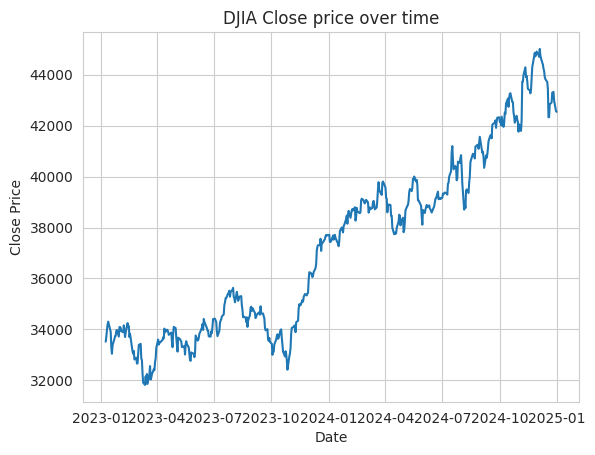

In [ ]:
# YOUR CODE HERE
# Create time-series plot of Close price
plt.plot(djia_df["Date"],djia_df["Close"])
plt.title("DJIA Close price over time")
plt.xlabel('Date')
plt.ylabel('Close Price')


Text(0, 0.5, 'Frequency')

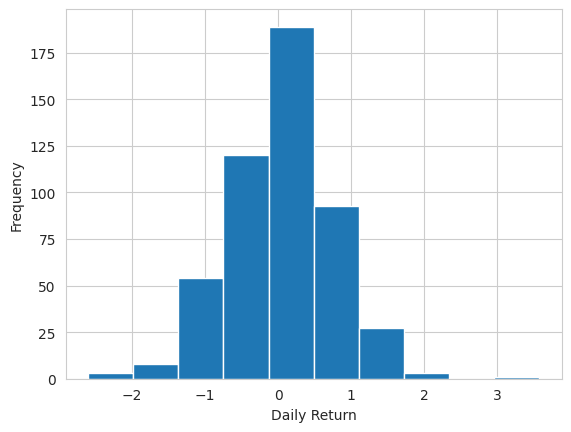

In [ ]:
# YOUR CODE HERE
# Create histogram of Daily_Return
djia_df["Daily_Return"].plot(kind = 'hist')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')



---

## Task 4 — Multi-Dataset Analysis (20 points)

Load and analyse foreign exchange (FX) data **from your downloaded FRED CSV file** alongside the DJIA.

**Requirements:**
1. Load `fx_usd_gbp.csv` into a DataFrame called `fx_df` using `pd.read_csv()`
2. Rename columns as needed to have: `Date`, `USD_GBP`
3. Handle any missing or invalid values (FRED uses "." for missing data)
4. Create a column called `FX_Return` (percentage change in USD_GBP)
5. Merge or align the DJIA and FX data by date
6. Create a comparative plot showing both DJIA Close and USD_GBP over time

**FRED Data Notes:**
- FRED CSV files typically have columns: `DATE`, `DEXUSUK` (the series code)
- Missing values may appear as "." - you'll need to handle these
- Daily FX data may have different dates than DJIA (different trading calendars)

**Hints:**
- Use `na_values=['.']` in `pd.read_csv()` to handle FRED's missing value format
- For dual-axis plots, use `ax.twinx()` or plot normalized values

        Date  USD_GBP  FX_Return
1 2023-01-04   1.2063   0.776942
2 2023-01-05   1.1902  -1.334660
3 2023-01-06   1.2064   1.361116
4 2023-01-09   1.2206   1.177056
5 2023-01-10   1.2155  -0.417827
<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 520
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       499 non-null    datetime64[ns]
 1   USD_GBP    499 non-null    float64       
 2   FX_Return  499 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.6 KB
None


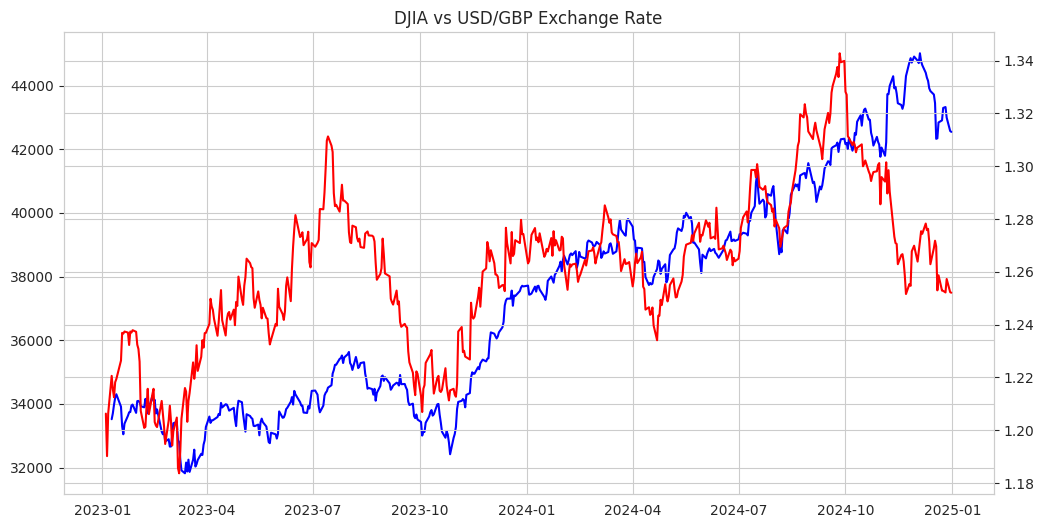

In [ ]:
# First, peek at the raw CSV to understand FRED's format
# Uncomment and run this to see raw file contents:
#!head -5 fx_usd_gbp.csv

# YOUR CODE HERE
# Step 1: Load fx_usd_gbp.csv into fx_df
# Note: FRED uses "." for missing values
# fx_df = pd.read_csv('fx_usd_gbp.csv', parse_dates=['DATE'], na_values=['.'])
fx_df = pd.read_csv('fx_usd_gbp.csv', parse_dates=['observation_date'], na_values=['.'])

# Step 2: Rename columns to required format
# FRED columns are typically: DATE, DEXUSUK
fx_df = fx_df.rename(columns={'observation_date': 'Date', 'DEXUSUK': 'USD_GBP'})

# Step 3: Handle missing values
fx_df = fx_df.dropna()  # or use .fillna() if appropriate

# Step 4: Create FX_Return column (percentage change)
fx_df['FX_Return'] = fx_df['USD_GBP'].pct_change() * 100
fx_df = fx_df.dropna()  # or use .fillna() if appropriate

# Step 5: Display the data
# fx_df.head()
# fx_df.info()
print(fx_df.head())
print(fx_df.info())

# Step 6: Create comparative visualisation
# Option A: Dual-axis plot
# fig, ax1 = plt.subplots(figsize=(12, 6))
# ax2 = ax1.twinx()
# ax1.plot(djia_df['Date'], djia_df['Close'], 'b-', label='DJIA')
# ax2.plot(fx_df['Date'], fx_df['USD_GBP'], 'r-', label='USD/GBP')
# plt.title('DJIA vs USD/GBP Exchange Rate')
# plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(djia_df['Date'], djia_df['Close'], 'b-', label='DJIA')
ax2.plot(fx_df['Date'], fx_df['USD_GBP'], 'r-', label='USD/GBP')
plt.title('DJIA vs USD/GBP Exchange Rate')
plt.show()

---

## Task 5 — Macro Insight (20 points)

Analyse the relationship between interest rates and market performance using **real Federal Reserve data**.

**Requirements:**
1. Load `fed_funds_rate.csv` into a DataFrame called `rates_df` using `pd.read_csv()`
2. Rename columns as needed to have: `Date` (datetime), `FEDFUNDS`
3. Handle any missing values (FRED uses "." for missing data)
4. Create a plot showing the FEDFUNDS rate over time (2020-2024)
5. Write a short analysis (5-8 sentences) in the variable `analysis_text` explaining:
   - What patterns you observe in interest rates (especially the 2022-2023 hiking cycle)
   - How changes in interest rates might affect stock markets
   - Any relationship you notice between interest rates, FX, and DJIA

**FRED Data Notes:**
- FRED columns are typically: `DATE`, `FEDFUNDS`
- Monthly data - each row represents the average rate for that month
- The Fed raised rates aggressively in 2022-2023 - your data should show this!

**Context for Analysis:**
- The Fed began raising rates in March 2022 to combat inflation
- Higher rates typically pressure stock valuations
- Rate differentials between countries affect exchange rates

        Date  FEDFUNDS
0 2020-01-01      1.55
1 2020-02-01      1.58
2 2020-03-01      0.65
3 2020-04-01      0.05
4 2020-05-01      0.05
         Date  FEDFUNDS
55 2024-08-01      5.33
56 2024-09-01      5.13
57 2024-10-01      4.83
58 2024-11-01      4.64
59 2024-12-01      4.48
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   FEDFUNDS  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB
None


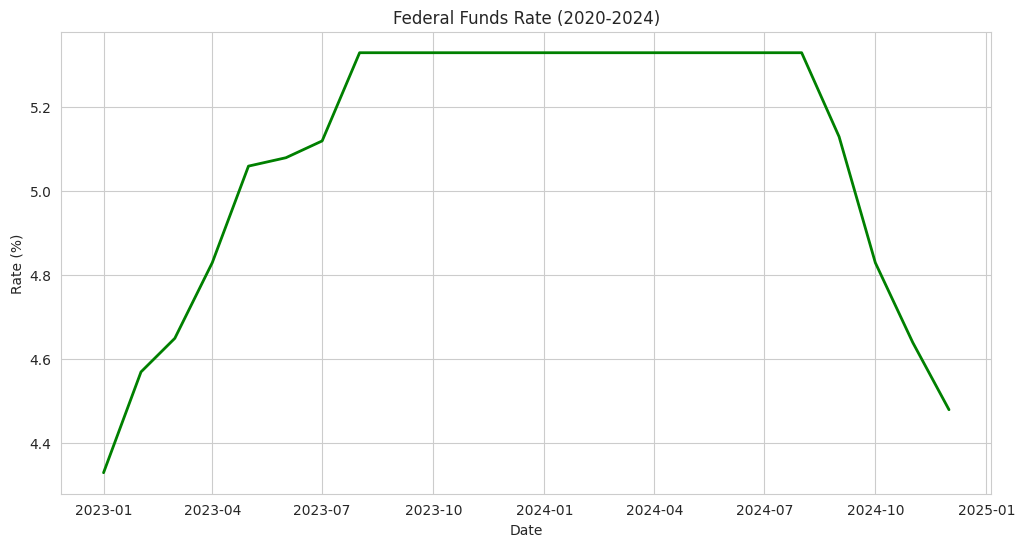

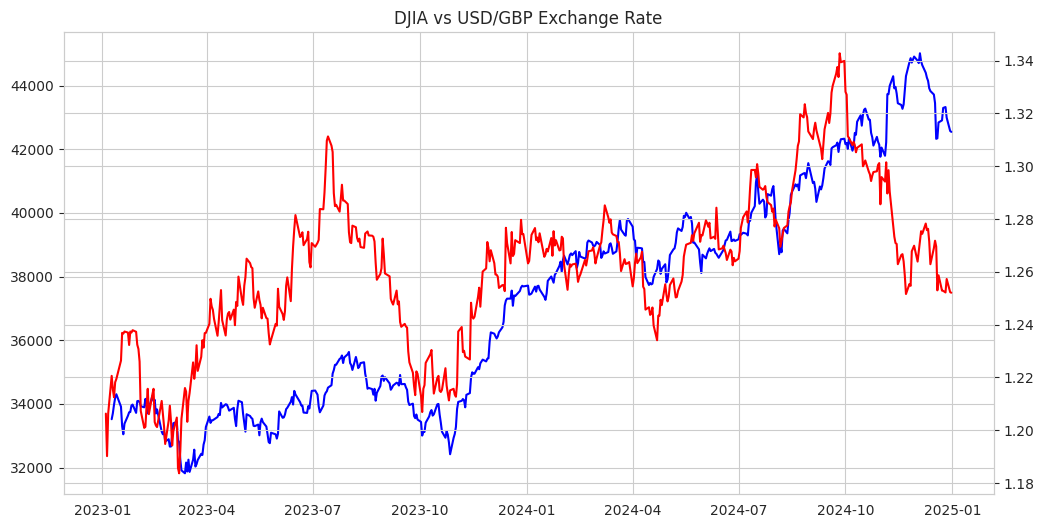

In [ ]:
# First, peek at the raw CSV to understand FRED's format
# Uncomment and run this to see raw file contents:
# !head -5 fed_funds_rate.csv

# YOUR CODE HERE
# Step 1: Load fed_funds_rate.csv into rates_df
# rates_df = pd.read_csv('fed_funds_rate.csv', parse_dates=['DATE'], na_values=['.'])
rates_df = pd.read_csv('fed_funds_rate.csv', parse_dates=['observation_date'], na_values=['.'])
# Step 2: Rename columns to required format
# rates_df = rates_df.rename(columns={'DATE': 'Date'})
rates_df = rates_df.rename(columns={'observation_date': 'Date'})
# Step 3: Handle missing values if any
# rates_df = rates_df.dropna()
rates_df = rates_df.dropna()
# Step 4: Display the data
# rates_df.head()
# rates_df.tail()
# rates_df.info()

print(rates_df.head())
print(rates_df.tail())
print(rates_df.info())

# Step 5: Create visualisation of FEDFUNDS over time
# plt.figure(figsize=(12, 6))
# plt.plot(rates_df['Date'], rates_df['FEDFUNDS'], 'g-', linewidth=2)
# plt.title('Federal Funds Rate (2020-2024)')
# plt.xlabel('Date')
# plt.ylabel('Rate (%)')
# plt.grid(True)
# plt.show()
rates_df = rates_df[rates_df["Date"] >= '2023-01-01']

plt.figure(figsize=(12, 6))
plt.plot(rates_df['Date'], rates_df['FEDFUNDS'], 'g-', linewidth=2)
plt.title('Federal Funds Rate (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.grid(True)
plt.show()


In [ ]:
# YOUR ANALYSIS HERE
# Write 5-8 sentences analysing the REAL data you've loaded and visualised

analysis_text = """
The FED rates were increasing starting around 2022 and it went as high as 5% around 2024. There was high inflation in the economy that caused the FED to raise rates.
The stocks did not fall when the rates rose. The stocks still increased while the rate stabilized.
USD/GBP seemed to follow the interest rate. It appear to have a positive correlation.
"""

print(analysis_text)


The FED rates were increasing starting around 2022 and it went as high as 5% around 2024. There was high inflation in the economy that caused the FED to raise rates.
The stocks did not fall when the rates rose. The stocks still increased while the rate stabilized. 
USD/GBP seemed to follow the interest rate. It appear to have a positive correlation. 



---

## Submission

**To submit your completed assessment:**

1. **Save your notebook:** File → Download → Download .ipynb
2. **Upload here:** [Submit Assessment](https://docs.google.com/forms/d/e/1FAIpQLSd27i40HquHx5xI6IX_mMrNq63FX8THgdg38a9EFjvIJMls-Q/viewform)

**Note:** Make sure your notebook runs without errors before submitting!